In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def composite_simpson(a,b,n,f):
    if n%2 != 0:
        n += 1
    t = np.linspace(a, b, n + 1)
    h = (b - a) / n
    return h/3. * (f(t[0]) + 2*np.sum(f(t[2:-1:2])) + 4*np.sum(f(t[1::2])) + f(t[-1]))

In [28]:
def composite_trapezoid(a,b,n,f):
    t = np.linspace(a, b, n + 1)
    h = (b - a) / n
    return h/2. * (f(t[0]) + 2*np.sum(f(t[1:-1])) + f(t[-1]))

In [123]:
C = 1.03439984
T = 1.75418438
g = 9.8
exact_integral = np.sqrt(2*C / g) * (T - 10 ** (-4))

def func(t):
    dx = C * (1 - np.cos(2*t))
    derivative_y = np.sin(2*t) / (1 - np.cos(2*t))
    y = C * (1 - np.cos(2*t)) / 2
    return np.sqrt((1 + derivative_y ** 2) / (2 * g * y)) * dx

def error_simpson(a,b,n):
    return np.abs(exact_integral - composite_simpson(a,b,n,func))
def error_trapezoid(a,b,n):
    return np.abs(exact_integral - composite_trapezoid(a,b,n,func))

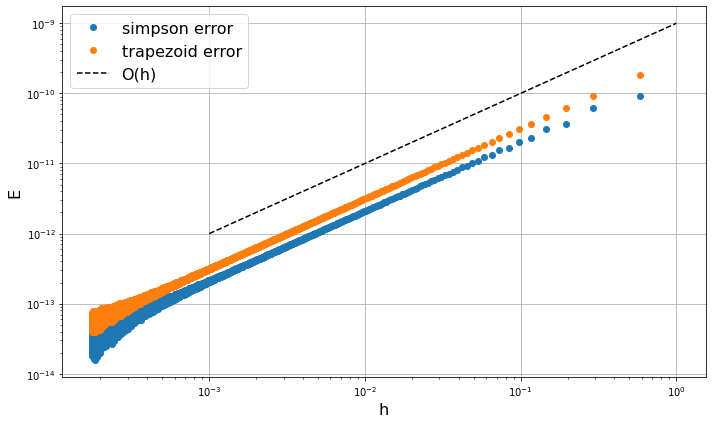

In [125]:
n = np.linspace(3, 9999, 3333, dtype = int)
a = 10 ** (-4)
b = 1.75418438
h_for_scaling = np.logspace(-3,0,4)
fig, ax = plt.subplots(figsize=(10,6))
ax.loglog((b - a) / n, [error_simpson(a,b,n_) for n_ in n], 'o', label = 'simpson error')
ax.loglog((b - a) / n, [error_trapezoid(a,b,n_) for n_ in n], 'o', label = 'trapezoid error')
ax.loglog(h_for_scaling, [i/10**(9) for i in h_for_scaling], 'k--', label = 'O(h)')
ax.set_xlabel('h', fontsize = 16)
ax.set_ylabel('E', fontsize = 16)
ax.legend(fontsize = 16)
plt.tight_layout()
ax.grid()